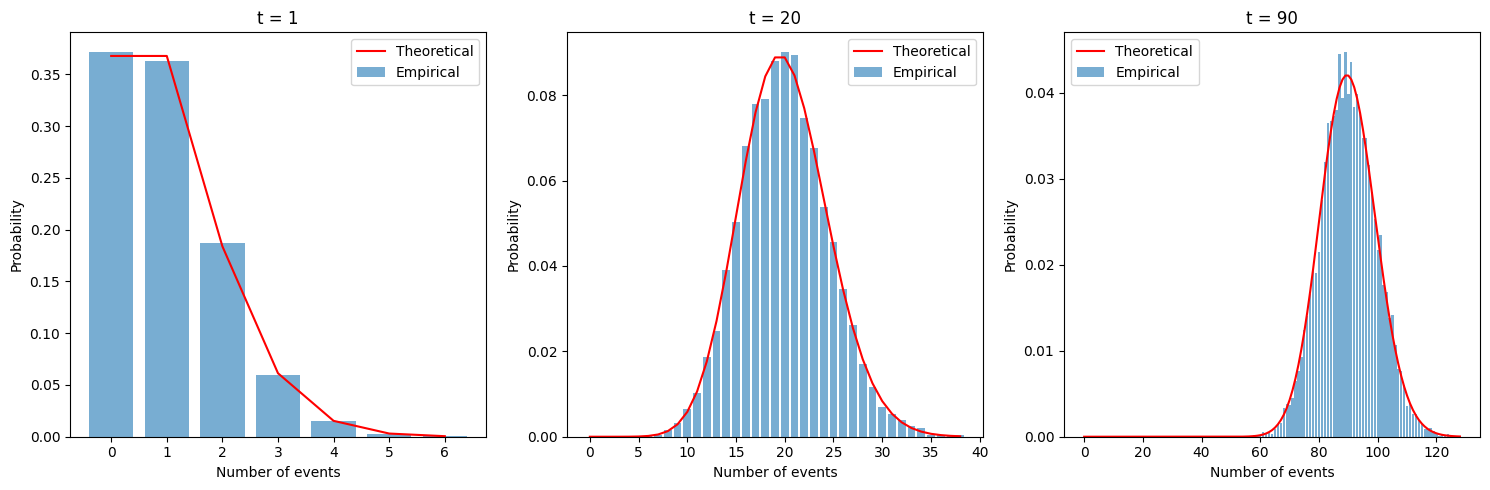

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

lambda_ = 1.0
num_trajectories = 10000
time_points = [1, 20, 90]

def generate_poisson_trajectory(lambda_, time):
    return np.random.poisson(lambda_ * time)

trajectories = {t: [generate_poisson_trajectory(lambda_, t) for _ in range(num_trajectories)] for t in time_points}

empirical_distributions = {t: np.bincount(trajectories[t]) / num_trajectories for t in time_points}

plt.figure(figsize=(15, 5))

for i, t in enumerate(time_points):
    plt.subplot(1, len(time_points), i + 1)
    plt.bar(range(len(empirical_distributions[t])), empirical_distributions[t], label="Empirical", alpha=0.6)
    
    poisson_dist = poisson.pmf(range(len(empirical_distributions[t])), lambda_ * t)
    plt.plot(poisson_dist, 'r', label="Theoretical")

    plt.title(f"t = {t}")
    plt.xlabel("Number of events")
    plt.ylabel("Probability")
    plt.legend()

plt.tight_layout()
plt.show()
